In [1]:
%load_ext autoreload
%autoreload 2

In [10]:
import pandas as pd
import numpy as np
import copy
from ta_lib.core.api import load_yml,create_context
# from ta_lib.data_utils import offline_constants
from ta_lib.data_utils.data_processing.offline.baseprice import get_base_price

In [6]:
config_path = '../conf/config.yml'
cfg=create_context(config_path)

In [7]:
# cfg.offline['BASE']
import os
import os.path as op
path_ = '/opt/sasdata/dev/PricingEngines/DiscountEngines/Russia/data/processed/idv_data/digital/base/'

paths=[op.join(path_,i) for i in sorted(os.listdir(path_))]

FileNotFoundError: [Errno 2] No such file or directory: '/opt/sasdata/dev/PricingEngines/DiscountEngines/Russia/data/processed/idv_data/digital/base/'

In [15]:
# from ta_lib.data_utils.data_processing.get_aggregated_data import format_dtype,  overwrite
# import os
# import gc
# import datetime
# import sys
# import glob

# from ta_lib.core.api import _change_permissions_recursive

In [ ]:
# def get_mode_val(df_temp):
#     return df_temp.mode().values[:1]

In [ ]:
# for run_date in dates_[:]:
#     get_mode_from_trn(cfg.offline,run_date,'all',False)
#     break

In [12]:
df_final = pd.DataFrame()
for i in paths:
    df_final = df_final.append(pd.read_parquet(i))

In [15]:
df_final=pd.read_parquet(path_)

In [16]:
df_offer2=pd.read_parquet('/opt/sasdata/dev/PricingEngines/DiscountEngines/Russia/data/processed/idv_data/digital/base_bkp')

In [19]:
df_final_check = df_final.merge(df_offer2,on=['pos_busn_dt','sld_menu_itm_id','company'])

In [30]:
df_final_check[(df_final_check.base_price_x>df_final_check.mode_price_x)]

,pos_busn_dt,base_price_x,mode_price_x,offer_x,sld_menu_itm_id,company,base_price_y,mode_price_y,monthid,offer_y
10719,2020-03-20,94.0,84.0,NaN,1044,mcopco,94.0,84.0,202003,NaN
10720,2020-03-25,94.0,84.0,NaN,1044,mcopco,94.0,84.0,202003,NaN
10721,2020-03-27,94.0,84.0,NaN,1044,mcopco,94.0,84.0,202003,NaN
10722,2020-03-28,94.0,84.0,NaN,1044,mcopco,94.0,84.0,202003,NaN
10724,2020-04-12,94.0,84.0,NaN,1044,mcopco,94.0,84.0,202004,NaN
...,...,...,...,...,...,...,...,...,...,...
299480,2021-07-31,105.0,95.0,NaN,9350,mcopco,105.0,95.0,202107,NaN
299481,2021-08-01,105.0,95.0,NaN,9350,mcopco,105.0,95.0,202108,NaN
299482,2021-08-02,105.0,95.0,NaN,9350,mcopco,105.0,95.0,202108,NaN
299483,2021-08-03,105.0,95.0,NaN,9350,mcopco,105.0,95.0,202108,NaN


In [32]:
df_offer2[(df_offer2.base_price>df_offer2.mode_price)]

,pos_busn_dt,base_price,mode_price,monthid,offer,sld_menu_itm_id,company
10719,2020-03-20,94.0,84.0,202003,NaN,1044,mcopco
10720,2020-03-25,94.0,84.0,202003,NaN,1044,mcopco
10721,2020-03-27,94.0,84.0,202003,NaN,1044,mcopco
10722,2020-03-28,94.0,84.0,202003,NaN,1044,mcopco
10723,2020-04-02,94.0,84.0,202004,NaN,1044,mcopco
...,...,...,...,...,...,...,...
304562,2021-07-31,105.0,95.0,202107,NaN,9350,mcopco
304563,2021-08-01,105.0,95.0,202108,NaN,9350,mcopco
304564,2021-08-02,105.0,95.0,202108,NaN,9350,mcopco
304565,2021-08-03,105.0,95.0,202108,NaN,9350,mcopco


In [33]:
df_offer[df_offer['base_price']!=df_offer['mode_price']]

,pos_busn_dt,sld_menu_itm_id,base_price,mode_price,offer
729,2019-12-31,2000,48.0,50.0,NaN
730,2020-01-01,2000,48.0,50.0,NaN
731,2020-01-02,2000,48.0,50.0,NaN
812,2020-03-23,2000,48.0,29.0,1.0
813,2020-03-24,2000,48.0,29.0,1.0
814,2020-03-25,2000,48.0,29.0,1.0
815,2020-03-26,2000,48.0,29.0,1.0
816,2020-03-27,2000,48.0,29.0,1.0
817,2020-03-28,2000,48.0,29.0,1.0
818,2020-03-29,2000,48.0,29.0,1.0


In [8]:
op_path = cfg.offline["BASE"].format(**cfg.offline,type_='digital')

In [9]:
op_path

'/opt/sasdata/dev/PricingEngines/Engine/DiscountEngines/Russia/data/processed/idv_data/digital/base/'

In [12]:
df_dig = get_base_price(cfg,data=["digital"],save_data=True,st_dt="2020-03-01",end_dt="2022-01-11")

Successfully read data  digital
1120


  0%|          | 1/1120 [00:00<07:31,  2.48it/s]

8882
8888


  0%|          | 2/1120 [00:01<19:28,  1.05s/it]

8882
8888


  1%|          | 6/1120 [00:04<10:43,  1.73it/s]

8883
8889


  1%|          | 11/1120 [00:07<09:21,  1.97it/s]

8882
8888


  1%|          | 13/1120 [00:09<12:25,  1.49it/s]

8882
8888


  1%|▏         | 14/1120 [00:10<17:00,  1.08it/s]

7001


  2%|▏         | 21/1120 [00:14<07:47,  2.35it/s]

8883
8889


  3%|▎         | 32/1120 [00:19<08:54,  2.04it/s]

8882
8888


  4%|▍         | 50/1120 [00:27<05:29,  3.25it/s]

8883
8889


  5%|▍         | 53/1120 [00:30<11:28,  1.55it/s]

8883
8889


  5%|▌         | 61/1120 [00:33<05:02,  3.50it/s]

8883
8889


  6%|▌         | 64/1120 [00:35<08:18,  2.12it/s]

8882
8888


  6%|▋         | 70/1120 [00:39<11:17,  1.55it/s]

3057
7001


  7%|▋         | 76/1120 [00:42<08:10,  2.13it/s]

8883
8889


  8%|▊         | 85/1120 [00:46<05:44,  3.00it/s]

7001


  8%|▊         | 89/1120 [00:48<08:55,  1.93it/s]

8883
8889


  8%|▊         | 92/1120 [00:50<10:04,  1.70it/s]

8882
8888


  9%|▉         | 105/1120 [00:55<05:25,  3.12it/s]

8882
8888


  9%|▉         | 106/1120 [00:56<08:56,  1.89it/s]

8883
8889


 10%|█         | 113/1120 [00:59<07:24,  2.27it/s]

8882
8888


 11%|█         | 120/1120 [01:01<04:55,  3.39it/s]

8883
8889


 11%|█         | 122/1120 [01:02<06:27,  2.58it/s]

8882
8888


 12%|█▏        | 138/1120 [01:10<05:55,  2.76it/s]

8883
8889


 14%|█▎        | 152/1120 [01:15<04:36,  3.51it/s]

8882
8888


 14%|█▍        | 157/1120 [01:18<05:06,  3.14it/s]

8882
8888


 14%|█▍        | 161/1120 [01:21<07:42,  2.07it/s]

8882
8888


 15%|█▍        | 163/1120 [01:23<11:46,  1.35it/s]

8883
8889


 15%|█▌        | 172/1120 [01:27<07:22,  2.14it/s]

8882
8888


 15%|█▌        | 173/1120 [01:28<11:18,  1.40it/s]

8882
8888


 16%|█▌        | 179/1120 [01:32<09:56,  1.58it/s]

8883
8889


 17%|█▋        | 190/1120 [01:37<05:19,  2.91it/s]

8883
8889


 17%|█▋        | 194/1120 [01:39<04:45,  3.25it/s]

8883
8889


 18%|█▊        | 199/1120 [01:41<05:37,  2.73it/s]

8883
8889


 18%|█▊        | 206/1120 [01:44<06:08,  2.48it/s]

8882
8888


 18%|█▊        | 207/1120 [01:45<08:22,  1.82it/s]

8883
8889


 22%|██▏       | 251/1120 [02:01<06:10,  2.34it/s]

8883
8889


 24%|██▍       | 266/1120 [02:06<04:54,  2.90it/s]

8882
8888


 24%|██▍       | 272/1120 [02:10<06:57,  2.03it/s]

8883
8889


 25%|██▌       | 281/1120 [02:13<04:30,  3.11it/s]

8882
8888


 26%|██▌       | 293/1120 [02:19<06:56,  1.98it/s]

8883
8889


 27%|██▋       | 297/1120 [02:21<06:22,  2.15it/s]

8882
8888


 27%|██▋       | 298/1120 [02:22<09:18,  1.47it/s]

3057
7001


 27%|██▋       | 304/1120 [02:25<06:31,  2.08it/s]

8882
8888


 28%|██▊       | 313/1120 [02:29<05:29,  2.45it/s]

8883
8889


 28%|██▊       | 315/1120 [02:30<06:04,  2.21it/s]

8882
8888


 29%|██▉       | 322/1120 [02:34<05:39,  2.35it/s]

8883
8889


 29%|██▉       | 327/1120 [02:36<05:20,  2.48it/s]

8883
8889


 30%|██▉       | 335/1120 [02:39<03:05,  4.23it/s]

8883
8889


 31%|███       | 344/1120 [02:43<06:02,  2.14it/s]

8882
8888


 31%|███       | 345/1120 [02:44<07:23,  1.75it/s]

8883
8889


 32%|███▏      | 361/1120 [02:50<04:15,  2.98it/s]

8883
8889


 34%|███▍      | 382/1120 [02:58<04:12,  2.92it/s]

8882
8888


 37%|███▋      | 412/1120 [03:08<03:12,  3.68it/s]

8882
8888


 37%|███▋      | 415/1120 [03:10<05:03,  2.32it/s]

8883
8889


 38%|███▊      | 425/1120 [03:14<03:39,  3.17it/s]

8882
8888


 39%|███▉      | 437/1120 [03:18<03:24,  3.34it/s]

8882
8888


 40%|████      | 449/1120 [03:23<03:39,  3.06it/s]

8882
8888


 40%|████      | 452/1120 [03:24<04:01,  2.76it/s]

8883
8889


 41%|████      | 456/1120 [03:26<03:25,  3.23it/s]

8883
8889


 41%|████▏     | 462/1120 [03:28<03:10,  3.46it/s]

8882
8888


 41%|████▏     | 464/1120 [03:30<04:53,  2.23it/s]

8883
8889


 42%|████▏     | 474/1120 [03:35<04:06,  2.62it/s]

8883
8889


 42%|████▎     | 476/1120 [03:36<04:53,  2.20it/s]

3057
7001


 44%|████▍     | 492/1120 [03:44<03:17,  3.18it/s]

8883
8889


 45%|████▍     | 499/1120 [03:46<02:26,  4.25it/s]

8883
8889


 47%|████▋     | 525/1120 [03:55<02:09,  4.59it/s]

8882
8888


 48%|████▊     | 534/1120 [03:59<04:05,  2.39it/s]

8882
8888


 48%|████▊     | 539/1120 [04:01<04:19,  2.24it/s]

8883
8889


 49%|████▉     | 550/1120 [04:05<02:58,  3.19it/s]

8883
8889


 49%|████▉     | 551/1120 [04:06<05:17,  1.79it/s]

8883
8889


 50%|█████     | 561/1120 [04:10<03:33,  2.62it/s]

8883
8889


 50%|█████     | 565/1120 [04:12<04:07,  2.24it/s]

8883
8889


 51%|█████     | 566/1120 [04:14<05:47,  1.59it/s]

3057
7001


 51%|█████     | 573/1120 [04:17<03:51,  2.36it/s]

8883
8889


 52%|█████▏    | 581/1120 [04:20<03:54,  2.30it/s]

8882
8888


 52%|█████▏    | 582/1120 [04:21<05:28,  1.64it/s]

8883
8889


 53%|█████▎    | 594/1120 [04:26<03:49,  2.29it/s]

8882
8888


 54%|█████▎    | 601/1120 [04:29<02:36,  3.31it/s]

8882
8888


 54%|█████▍    | 602/1120 [04:30<04:49,  1.79it/s]

8883
8889


 55%|█████▍    | 612/1120 [04:35<04:02,  2.10it/s]

8882
8888


 55%|█████▌    | 621/1120 [04:39<04:15,  1.95it/s]

7001


 56%|█████▌    | 626/1120 [04:41<02:43,  3.02it/s]

8882
8888


 56%|█████▌    | 629/1120 [04:43<03:19,  2.46it/s]

8882
8888


 58%|█████▊    | 651/1120 [04:52<03:40,  2.13it/s]

8883
8889


 59%|█████▊    | 656/1120 [04:55<04:50,  1.60it/s]

8883
8889


 60%|█████▉    | 667/1120 [04:58<02:20,  3.22it/s]

8883
8889


 61%|██████▏   | 687/1120 [05:06<02:38,  2.74it/s]

7001


 62%|██████▏   | 693/1120 [05:08<01:40,  4.26it/s]

8883
8889


 62%|██████▏   | 696/1120 [05:11<04:45,  1.49it/s]

8882
8888


 62%|██████▏   | 698/1120 [05:12<05:01,  1.40it/s]

8883
8889


 63%|██████▎   | 705/1120 [05:15<02:23,  2.89it/s]

8883
8889


 64%|██████▍   | 714/1120 [05:20<03:18,  2.04it/s]

8883
8889


 64%|██████▍   | 717/1120 [05:22<04:03,  1.66it/s]

8883
8889


 65%|██████▍   | 727/1120 [05:26<01:47,  3.66it/s]

8882
8888


 65%|██████▌   | 729/1120 [05:27<03:01,  2.15it/s]

8882
8888


 66%|██████▌   | 735/1120 [05:30<02:11,  2.92it/s]

8883
8889


 66%|██████▌   | 737/1120 [05:31<02:35,  2.46it/s]

8882
8888


 67%|██████▋   | 747/1120 [05:36<02:10,  2.86it/s]

8883
8889


 67%|██████▋   | 748/1120 [05:36<02:53,  2.15it/s]

8882
8888


 67%|██████▋   | 750/1120 [05:38<03:09,  1.96it/s]

3057
7001


 68%|██████▊   | 765/1120 [05:44<01:47,  3.31it/s]

8882
8888


 69%|██████▉   | 772/1120 [05:47<01:44,  3.32it/s]

8882
8888


 72%|███████▏  | 807/1120 [06:00<01:13,  4.24it/s]

8883
8889


 73%|███████▎  | 815/1120 [06:04<02:28,  2.05it/s]

8882
8888


 74%|███████▍  | 826/1120 [06:09<01:48,  2.70it/s]

8883
8889


 74%|███████▍  | 832/1120 [06:12<02:12,  2.18it/s]

8883
8889


 75%|███████▍  | 839/1120 [06:14<01:12,  3.85it/s]

8882
8888


 75%|███████▌  | 845/1120 [06:18<02:33,  1.79it/s]

8883
8889


 76%|███████▌  | 853/1120 [06:22<01:23,  3.20it/s]

8883
8889


 76%|███████▋  | 854/1120 [06:23<02:58,  1.49it/s]

3057
7001


 76%|███████▋  | 856/1120 [06:25<03:02,  1.44it/s]

8882
8888


 77%|███████▋  | 866/1120 [06:30<02:19,  1.82it/s]

8883
8889


 78%|███████▊  | 870/1120 [06:32<02:24,  1.73it/s]

8882
8888


 78%|███████▊  | 876/1120 [06:35<01:33,  2.62it/s]

8883
8889


 79%|███████▊  | 880/1120 [06:36<01:18,  3.05it/s]

8883
8889


 79%|███████▉  | 883/1120 [06:39<02:11,  1.81it/s]

8882
8888


 79%|███████▉  | 887/1120 [06:41<02:05,  1.86it/s]

8882
8888


 80%|███████▉  | 894/1120 [06:44<01:24,  2.66it/s]

8882
8888


 81%|████████  | 907/1120 [06:50<01:40,  2.12it/s]

8882
8888


 85%|████████▌ | 955/1120 [07:07<01:07,  2.45it/s]

8883
8889


 86%|████████▌ | 958/1120 [07:09<01:04,  2.52it/s]

8883
8889


 87%|████████▋ | 974/1120 [07:14<00:40,  3.56it/s]

8882
8888


 88%|████████▊ | 987/1120 [07:19<00:59,  2.25it/s]

8882
8888


 88%|████████▊ | 991/1120 [07:21<00:57,  2.23it/s]

8883
8889


 91%|█████████ | 1014/1120 [07:29<00:31,  3.39it/s]

8882
8888


 91%|█████████ | 1016/1120 [07:30<00:43,  2.40it/s]

8883
8889


 91%|█████████▏| 1023/1120 [07:35<00:54,  1.78it/s]

8883
8889


 92%|█████████▏| 1027/1120 [07:36<00:41,  2.26it/s]

8882
8888


 92%|█████████▏| 1031/1120 [07:38<00:38,  2.29it/s]

8883
8889


 92%|█████████▏| 1033/1120 [07:40<00:42,  2.04it/s]

8882
8888


 93%|█████████▎| 1043/1120 [07:44<00:23,  3.29it/s]

8882
8888


 93%|█████████▎| 1044/1120 [07:45<00:36,  2.06it/s]

3057
7001


 95%|█████████▍| 1061/1120 [07:52<00:29,  2.00it/s]

8882
8888


 95%|█████████▌| 1068/1120 [07:55<00:16,  3.16it/s]

8882
8888


 96%|█████████▋| 1078/1120 [08:01<00:17,  2.47it/s]

8882
8888


 98%|█████████▊| 1096/1120 [08:07<00:08,  2.94it/s]

8883
8889


 98%|█████████▊| 1100/1120 [08:09<00:09,  2.15it/s]

8883
8889


 98%|█████████▊| 1102/1120 [08:10<00:10,  1.78it/s]

8883
8889


 99%|█████████▉| 1108/1120 [08:14<00:05,  2.16it/s]

8882
8888


100%|██████████| 1120/1120 [08:19<00:00,  2.24it/s]


In [13]:
df_offline = get_base_price(cfg,data=["offline"],save_data=True,st_dt="2018-01-01",end_dt="2022-01-11")

Successfully read data  offline
1693


  0%|          | 1/1693 [00:00<13:28,  2.09it/s]

8882
8888


  0%|          | 4/1693 [00:03<20:50,  1.35it/s]

8882
8888


  1%|          | 9/1693 [00:06<16:23,  1.71it/s]

8883
8889


  1%|          | 15/1693 [00:11<15:54,  1.76it/s]

8882
8888


  1%|          | 18/1693 [00:13<17:51,  1.56it/s]

8883
8889


  1%|          | 20/1693 [00:15<17:49,  1.56it/s]

8882
8888


  1%|          | 21/1693 [00:16<25:56,  1.07it/s]

7001


  2%|▏         | 28/1693 [00:20<13:30,  2.06it/s]

8882
8888


  2%|▏         | 32/1693 [00:22<12:20,  2.24it/s]

8883
8889


  3%|▎         | 46/1693 [00:30<15:46,  1.74it/s]

8882
8888


  3%|▎         | 56/1693 [00:34<09:10,  2.97it/s]

8883
8889


  4%|▍         | 70/1693 [00:42<10:48,  2.50it/s]

8883
8889


  4%|▍         | 72/1693 [00:44<19:54,  1.36it/s]

8882
8888


  4%|▍         | 75/1693 [00:46<17:26,  1.55it/s]

8883
8889


  5%|▍         | 84/1693 [00:50<07:44,  3.46it/s]

8883
8889


  5%|▌         | 88/1693 [00:53<12:18,  2.17it/s]

8882
8888


  6%|▌         | 97/1693 [00:59<19:27,  1.37it/s]

3057
7001


  6%|▌         | 103/1693 [01:03<15:22,  1.72it/s]

8883
8889


  7%|▋         | 114/1693 [01:09<10:07,  2.60it/s]

7001


  7%|▋         | 122/1693 [01:12<09:58,  2.62it/s]

8883
8889


  7%|▋         | 125/1693 [01:14<14:38,  1.79it/s]

8882
8888


  9%|▊         | 147/1693 [01:22<09:37,  2.68it/s]

8882
8888


  9%|▊         | 148/1693 [01:23<18:40,  1.38it/s]

8883
8889


  9%|▉         | 160/1693 [01:29<09:49,  2.60it/s]

8882
8888


 10%|▉         | 167/1693 [01:32<08:03,  3.16it/s]

8883
8889


 10%|█         | 175/1693 [01:35<08:56,  2.83it/s]

8882
8888


 12%|█▏        | 200/1693 [01:48<11:21,  2.19it/s]

8883
8889


 12%|█▏        | 206/1693 [01:51<12:15,  2.02it/s]

8882
8888


 13%|█▎        | 220/1693 [01:58<07:22,  3.33it/s]

8882
8888


 13%|█▎        | 225/1693 [02:01<11:28,  2.13it/s]

8883
8889


 13%|█▎        | 228/1693 [02:03<10:49,  2.25it/s]

8882
8888


 14%|█▍        | 234/1693 [02:07<10:33,  2.30it/s]

8882
8888


 14%|█▍        | 238/1693 [02:10<15:04,  1.61it/s]

8883
8889


 15%|█▍        | 251/1693 [02:17<11:17,  2.13it/s]

8882
8888


 15%|█▍        | 252/1693 [02:19<19:17,  1.24it/s]

8882
8888


 15%|█▌        | 260/1693 [02:24<13:53,  1.72it/s]

8883
8889


 16%|█▌        | 274/1693 [02:32<09:25,  2.51it/s]

8883
8889


 16%|█▋        | 279/1693 [02:34<08:55,  2.64it/s]

8883
8889


 17%|█▋        | 286/1693 [02:37<07:38,  3.07it/s]

8883
8889


 17%|█▋        | 290/1693 [02:39<08:57,  2.61it/s]

8882
8888


 18%|█▊        | 297/1693 [02:44<16:58,  1.37it/s]

8882
8888


 18%|█▊        | 298/1693 [02:46<20:01,  1.16it/s]

8883
8889


 18%|█▊        | 307/1693 [02:50<08:44,  2.64it/s]

8883
8889


 22%|██▏       | 367/1693 [03:15<10:28,  2.11it/s]

8883
8889


 23%|██▎       | 392/1693 [03:25<06:49,  3.17it/s]

8882
8888


 24%|██▎       | 402/1693 [03:31<10:45,  2.00it/s]

8883
8889


 25%|██▍       | 418/1693 [03:37<07:54,  2.69it/s]

8882
8888


 26%|██▌       | 433/1693 [03:46<10:12,  2.06it/s]

8883
8889


 26%|██▌       | 438/1693 [03:49<09:32,  2.19it/s]

8883
8889


 26%|██▌       | 440/1693 [03:50<11:24,  1.83it/s]

8882
8888


 26%|██▌       | 441/1693 [03:52<18:09,  1.15it/s]

3057
7001


 27%|██▋       | 450/1693 [03:57<09:58,  2.08it/s]

8882
8888


 27%|██▋       | 460/1693 [04:03<12:49,  1.60it/s]

8883
8889


 27%|██▋       | 462/1693 [04:05<15:04,  1.36it/s]

8882
8888


 28%|██▊       | 472/1693 [04:10<07:56,  2.56it/s]

8883
8889


 28%|██▊       | 478/1693 [04:13<09:11,  2.20it/s]

8883
8889


 28%|██▊       | 482/1693 [04:17<13:04,  1.54it/s]

8883
8889


 29%|██▊       | 484/1693 [04:18<12:43,  1.58it/s]

8883
8889


 29%|██▊       | 486/1693 [04:20<13:11,  1.53it/s]

8883
8889


 29%|██▉       | 497/1693 [04:24<05:44,  3.47it/s]

8883
8889


 29%|██▉       | 499/1693 [04:26<11:37,  1.71it/s]

8882
8888


 30%|███       | 512/1693 [04:33<09:23,  2.09it/s]

8882
8888


 30%|███       | 513/1693 [04:34<13:29,  1.46it/s]

8883
8889


 32%|███▏      | 536/1693 [04:44<06:26,  2.99it/s]

8883
8889


 34%|███▍      | 582/1693 [05:00<05:18,  3.49it/s]

8882
8888


 38%|███▊      | 637/1693 [05:19<05:18,  3.31it/s]

8882
8888


 38%|███▊      | 643/1693 [05:22<06:21,  2.75it/s]

8883
8889


 39%|███▊      | 653/1693 [05:28<07:37,  2.27it/s]

8882
8888


 39%|███▉      | 668/1693 [05:34<07:35,  2.25it/s]

8883
8889


 40%|███▉      | 672/1693 [05:36<06:47,  2.51it/s]

8882
8888


 41%|████      | 688/1693 [05:44<07:20,  2.28it/s]

8882
8888


 41%|████      | 691/1693 [05:46<08:21,  2.00it/s]

8883
8889


 41%|████▏     | 700/1693 [05:50<07:21,  2.25it/s]

8883
8889


 42%|████▏     | 706/1693 [05:54<07:25,  2.21it/s]

8882
8888


 42%|████▏     | 707/1693 [05:55<13:04,  1.26it/s]

8883
8889


 42%|████▏     | 713/1693 [05:59<07:08,  2.29it/s]

8882
8888


 43%|████▎     | 726/1693 [06:06<06:24,  2.51it/s]

8883
8889


 43%|████▎     | 729/1693 [06:08<09:16,  1.73it/s]

3057
7001


 43%|████▎     | 731/1693 [06:11<15:01,  1.07it/s]

8883
8889


 44%|████▍     | 753/1693 [06:22<03:34,  4.39it/s]

8883
8889


 45%|████▌     | 762/1693 [06:26<04:04,  3.81it/s]

8883
8889


 47%|████▋     | 788/1693 [06:37<08:35,  1.76it/s]

8882
8888


 47%|████▋     | 804/1693 [06:45<04:33,  3.25it/s]

8882
8888


 48%|████▊     | 812/1693 [06:49<05:03,  2.91it/s]

8883
8889


 48%|████▊     | 816/1693 [06:52<08:57,  1.63it/s]

8882
8888


 49%|████▉     | 827/1693 [06:56<05:09,  2.80it/s]

8883
8889


 50%|████▉     | 840/1693 [07:02<05:22,  2.64it/s]

8883
8889


 50%|████▉     | 842/1693 [07:04<09:03,  1.57it/s]

8883
8889


 50%|█████     | 854/1693 [07:10<05:54,  2.36it/s]

8883
8889


 51%|█████     | 859/1693 [07:13<06:50,  2.03it/s]

8882
8888


 51%|█████     | 860/1693 [07:14<09:19,  1.49it/s]

8883
8889


 51%|█████     | 861/1693 [07:16<13:52,  1.00s/it]

3057
7001


 51%|█████▏    | 870/1693 [07:20<04:44,  2.89it/s]

8883
8889


 52%|█████▏    | 876/1693 [07:24<06:11,  2.20it/s]

8883
8889


 52%|█████▏    | 886/1693 [07:29<06:16,  2.14it/s]

8882
8888


 52%|█████▏    | 888/1693 [07:30<07:33,  1.78it/s]

8883
8889


 53%|█████▎    | 896/1693 [07:35<06:37,  2.00it/s]

8882
8888


 54%|█████▎    | 906/1693 [07:40<04:51,  2.70it/s]

8882
8888


 54%|█████▎    | 908/1693 [07:42<06:31,  2.00it/s]

8883
8889


 54%|█████▍    | 911/1693 [07:44<07:33,  1.72it/s]

8882
8888


 54%|█████▍    | 920/1693 [07:48<03:54,  3.29it/s]

8882
8888


 55%|█████▍    | 923/1693 [07:50<06:16,  2.04it/s]

8883
8889


 55%|█████▌    | 936/1693 [07:58<07:37,  1.66it/s]

8882
8888


 56%|█████▌    | 947/1693 [08:05<08:23,  1.48it/s]

7001


 56%|█████▋    | 955/1693 [08:07<04:04,  3.02it/s]

8882
8888


 57%|█████▋    | 958/1693 [08:10<06:04,  2.02it/s]

8882
8888


 59%|█████▊    | 993/1693 [08:24<04:40,  2.50it/s]

8883
8889


 59%|█████▉    | 1005/1693 [08:30<05:00,  2.29it/s]

8883
8889


 60%|██████    | 1021/1693 [08:36<04:34,  2.45it/s]

8883
8889


 62%|██████▏   | 1058/1693 [08:52<04:14,  2.49it/s]

7001


 63%|██████▎   | 1066/1693 [08:54<03:09,  3.30it/s]

8883
8889


 63%|██████▎   | 1072/1693 [08:59<06:24,  1.61it/s]

8882
8888


 63%|██████▎   | 1075/1693 [09:01<06:18,  1.63it/s]

8883
8889


 64%|██████▍   | 1082/1693 [09:06<04:52,  2.09it/s]

8883
8889


 65%|██████▍   | 1096/1693 [09:15<06:16,  1.59it/s]

8882
8888


 65%|██████▍   | 1097/1693 [09:16<07:40,  1.30it/s]

8883
8889


 65%|██████▌   | 1101/1693 [09:19<07:32,  1.31it/s]

8883
8889


 65%|██████▌   | 1106/1693 [09:22<06:20,  1.54it/s]

8882
8888


 66%|██████▌   | 1116/1693 [09:25<02:56,  3.27it/s]

8882
8888


 66%|██████▌   | 1121/1693 [09:28<03:24,  2.80it/s]

8882
8888


 67%|██████▋   | 1128/1693 [09:32<03:38,  2.59it/s]

8883
8889


 67%|██████▋   | 1130/1693 [09:33<05:08,  1.83it/s]

8882
8888


 67%|██████▋   | 1134/1693 [09:37<05:46,  1.61it/s]

8883
8889


 68%|██████▊   | 1147/1693 [09:43<04:26,  2.05it/s]

8883
8889


 68%|██████▊   | 1148/1693 [09:44<06:16,  1.45it/s]

8882
8888


 68%|██████▊   | 1152/1693 [09:47<04:38,  1.94it/s]

3057
7001


 68%|██████▊   | 1156/1693 [09:51<07:27,  1.20it/s]

8882
8888


 69%|██████▉   | 1174/1693 [10:00<02:02,  4.22it/s]

8882
8888


 70%|██████▉   | 1183/1693 [10:05<02:54,  2.92it/s]

8882
8888


 72%|███████▏  | 1212/1693 [10:19<03:59,  2.01it/s]

8883
8889


 73%|███████▎  | 1242/1693 [10:30<02:07,  3.53it/s]

8883
8889


 74%|███████▍  | 1254/1693 [10:37<03:28,  2.11it/s]

8882
8888


 75%|███████▍  | 1269/1693 [10:44<03:14,  2.17it/s]

8883
8889


 76%|███████▌  | 1279/1693 [10:51<02:54,  2.37it/s]

8883
8889


 76%|███████▌  | 1284/1693 [10:53<02:27,  2.77it/s]

8882
8888


 76%|███████▌  | 1288/1693 [10:56<03:31,  1.91it/s]

8882
8888


 76%|███████▋  | 1292/1693 [10:59<04:40,  1.43it/s]

8883
8889


 77%|███████▋  | 1302/1693 [11:04<02:13,  2.92it/s]

8883
8889


 77%|███████▋  | 1304/1693 [11:07<04:31,  1.43it/s]

3057
7001


 77%|███████▋  | 1308/1693 [11:10<04:23,  1.46it/s]

8882
8888


 78%|███████▊  | 1318/1693 [11:17<04:39,  1.34it/s]

8883
8889


 78%|███████▊  | 1324/1693 [11:20<03:06,  1.98it/s]

8882
8888


 79%|███████▊  | 1332/1693 [11:25<02:41,  2.23it/s]

8883
8889


 79%|███████▉  | 1337/1693 [11:29<03:00,  1.97it/s]

8883
8889


 79%|███████▉  | 1340/1693 [11:31<04:03,  1.45it/s]

8882
8888


 79%|███████▉  | 1345/1693 [11:35<03:58,  1.46it/s]

8882
8888


 80%|███████▉  | 1353/1693 [11:40<02:28,  2.29it/s]

8882
8888


 80%|████████  | 1357/1693 [11:42<03:07,  1.79it/s]

8883
8889


 81%|████████  | 1370/1693 [11:50<03:01,  1.78it/s]

8882
8888


 85%|████████▌ | 1441/1693 [12:22<01:55,  2.18it/s]

8883
8889


 85%|████████▌ | 1446/1693 [12:25<02:07,  1.94it/s]

8883
8889


 87%|████████▋ | 1472/1693 [12:34<01:18,  2.82it/s]

8882
8888


 88%|████████▊ | 1491/1693 [12:44<01:23,  2.41it/s]

8882
8888


 88%|████████▊ | 1495/1693 [12:46<01:47,  1.84it/s]

8883
8889


 90%|█████████ | 1530/1693 [13:00<01:13,  2.22it/s]

8882
8888


 90%|█████████ | 1532/1693 [13:02<01:40,  1.60it/s]

8883
8889


 91%|█████████ | 1542/1693 [13:09<01:22,  1.83it/s]

8883
8889


 91%|█████████▏| 1547/1693 [13:11<01:18,  1.85it/s]

8882
8888


 92%|█████████▏| 1558/1693 [13:15<00:39,  3.41it/s]

8883
8889


 92%|█████████▏| 1560/1693 [13:17<01:07,  1.98it/s]

8882
8888


 93%|█████████▎| 1577/1693 [13:26<00:44,  2.60it/s]

8882
8888


 93%|█████████▎| 1580/1693 [13:28<00:59,  1.90it/s]

3057
7001


 94%|█████████▎| 1584/1693 [13:31<01:08,  1.60it/s]

8882
8888


 95%|█████████▍| 1604/1693 [13:41<00:42,  2.07it/s]

8882
8888


 95%|█████████▌| 1612/1693 [13:45<00:29,  2.74it/s]

8882
8888


 96%|█████████▋| 1630/1693 [13:55<00:27,  2.29it/s]

8882
8888


 97%|█████████▋| 1639/1693 [13:59<00:19,  2.80it/s]

8883
8889


 98%|█████████▊| 1656/1693 [14:07<00:16,  2.30it/s]

8883
8889


 98%|█████████▊| 1662/1693 [14:11<00:14,  2.19it/s]

8883
8889


 98%|█████████▊| 1665/1693 [14:14<00:17,  1.61it/s]

8882
8888


 98%|█████████▊| 1667/1693 [14:15<00:15,  1.67it/s]

8883
8889


 99%|█████████▉| 1677/1693 [14:21<00:07,  2.13it/s]

8882
8888


100%|██████████| 1693/1693 [14:30<00:00,  1.94it/s]


In [112]:
df = pd.read_parquet("/opt/sasdata/dev/PricingEngines/DiscountEngines/Russia/data/processed/offline/base/sld_menu_itm_id=2100")

In [113]:
df_mode = pd.read_parquet("/opt/sasdata/dev/PricingEngines/DiscountEngines/Russia/data/processed/digital/ungrouped_data/wap/sld_menu_itm_id=2100")

In [114]:
df.base_price.unique()

array([130., 135.])

<AxesSubplot:xlabel='pos_busn_dt'>

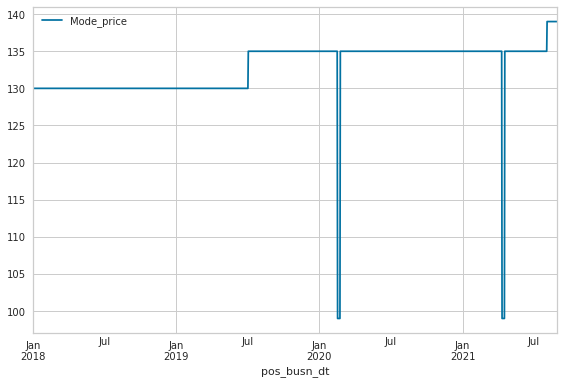

In [117]:
df_mode.plot("pos_busn_dt","Mode_price")

In [10]:
def find_periods(df_temp):
    """
    This function returns number of intervals with paticular price having interval length less than 30 days
    """
    df_temp = df_temp.reset_index(drop=True)
    df_temp['forward_date']=df_temp['pos_busn_dt'].shift(1)
    df_temp.loc[0,"forward_date"] = df_temp.loc[0,"pos_busn_dt"]
    df_temp['gap']=df_temp['pos_busn_dt']-df_temp['forward_date']
    groups = []
    if len(df_temp)>0:
        start_date=df_temp.iloc[0,0]
        end_date = df_temp.iloc[-1,0]
        gap_df=df_temp[df_temp.gap>'1 D']
        if len(gap_df):
            last_date = gap_df.iloc[-1,0]
            for index,row in gap_df.iterrows():
                groups.append((start_date,row['forward_date']))
                start_date = row['pos_busn_dt']
            groups.append((last_date,end_date))
        else:
            groups.append((start_date,end_date))
        temp = copy.deepcopy(groups)
        for grp in temp:
            if (grp[1]-grp[0]).days>30:
                groups.remove(grp)
    return groups

In [42]:
cfg=cfg
d="offline"
save_data=True
depth=False
save_depth=True
st_dt="2021-01-01"
end_dt="2021-08-01"

In [43]:
df_all = pd.DataFrame()
df_item_mode = pd.read_parquet(cfg.offline["WAP"].format(**cfg.offline,type_=d))
op_path = cfg.offline["BASE"].format(**cfg.offline,type_=d)
if d=="offline":            
    df_offer = pd.read_parquet(cfg.offline["OFFLINE_OFFER_PRICE"].format(**cfg.offline),columns = ["pos_busn_dt","sld_menu_itm_id","gross_price_amt"])
else:
    df_offer = pd.read_parquet(cfg.offline["DIGITAL_OFFER_PRICE"].format(**cfg.offline))
    df_offer.columns= ["pos_busn_dt","sld_menu_itm_id","gross_price_amt"]
    df_offer["sld_menu_itm_id"]= df_offer["sld_menu_itm_id"].astype(int)
    df_offer["pos_busn_dt"]= pd.to_datetime(df_offer["pos_busn_dt"])
print("Successfully read data ",d)
df_offer["offer"]=1
df_item_mode = df_item_mode.merge(df_offer,on=["pos_busn_dt","sld_menu_itm_id"],how="left")
df_all_items = pd.DataFrame()
items = [item for item in df_item_mode.sld_menu_itm_id.unique() if (item>=1000)&(item<10000)]

Successfully read data  offline


In [45]:
df_item_mode = df_item_mode[(df_item_mode.pos_busn_dt>=pd.to_datetime(st_dt))&(df_item_mode.pos_busn_dt<=pd.to_datetime(end_dt))].reset_index(drop=True)

In [46]:
item = 1496
df_item_level = df_item_mode[df_item_mode.sld_menu_itm_id==item]
print(df_item_level.columns)
print(df_item_level.shape)
df_item_level.Mode_price.fillna(method = "ffill",inplace=True)
df_item_level.Mode_price.fillna(method = "bfill",inplace=True)
df_dt_ranges = pd.DataFrame()
if not (df_item_level.empty):
    print(item,df_item_level.Mode_price)
    mode = df_item_level.Mode_price.mode().values[0]
#             if item iteself is a promo prod then if we replace it with na we have no data to fflill
    if ((df_item_level.offer.isna().sum()!=0)|(df_item_level.Mode_price.nunique())!=1):
        df_item_level.loc[df_item_level.offer==1,"Mode_price"] = np.nan
        df_item_level.Mode_price.fillna(method = "ffill",inplace=True)
        df_item_level.Mode_price.fillna(method = "bfill",inplace=True)
        df_item_level.Mode_price.fillna(mode,inplace=True)
    if df_item_level.shape[0]<30:
        df_item_level.Mode_price= df_item_level.Mode_price.mode().values[0]
    else:
        df_dt_ranges = df_item_level[df_item_level.offer!=1][["pos_busn_dt","Mode_price"]].groupby("Mode_price").apply(find_periods)
    if ((not (df_dt_ranges.empty)) and (df_item_level.Mode_price.nunique()!=1)):
        df_dt_ranges = df_dt_ranges.reset_index().rename(columns={0:"dt_range"})
        df_dt_ranges_all = df_dt_ranges.explode("dt_range") 
        df_dt_ranges = df_dt_ranges_all.dropna()
        if not (df_dt_ranges.empty):
            df_dt_ranges["start_dt"] =df_dt_ranges["dt_range"].apply(lambda x:x[0])
            df_dt_ranges["end_dt"] =df_dt_ranges["dt_range"].apply(lambda x:x[1])
            df_dt_ranges_temp = df_dt_ranges[["start_dt","end_dt"]].drop_duplicates()
            df_dt_ranges_temp["pos_busn_dt"] =  df_dt_ranges_temp.apply(lambda x: pd.date_range(x["start_dt"], x["end_dt"]), axis=1)
            df_dt_ranges_temp = df_dt_ranges_temp.explode("pos_busn_dt")
            df_dt_ranges = df_dt_ranges.merge(df_dt_ranges_temp,on=["start_dt","end_dt"])
            df_dt_ranges.drop(columns=["start_dt","end_dt","dt_range"],inplace=True)
            df_dt_ranges["pos_busn_dt"] = pd.to_datetime(df_dt_ranges["pos_busn_dt"])
            df_dt_ranges["remove"]=1
            df_item_level = df_item_level.merge(df_dt_ranges,on=["Mode_price","pos_busn_dt"],how="left")
            df_item_level.loc[df_item_level.remove==1,"Mode_price"]=np.nan
            df_item_level.Mode_price.fillna(method = "ffill",inplace=True)
            df_item_level.Mode_price.fillna(method = "bfill",inplace=True)
            df_item_level.drop(columns=["remove"],inplace=True)
    df_dts = pd.DataFrame(pd.date_range(st_dt,end_dt)).rename(columns={0:"pos_busn_dt"})
    df_item_level = df_item_level.merge(df_dts,on="pos_busn_dt",how="outer")
    df_item_level.Mode_price.fillna(method = "ffill",inplace=True)
    df_item_level.Mode_price.fillna(method = "bfill",inplace=True)
    df_item_level.Mode_price.fillna(mode,inplace=True)
    df_item_level["sld_menu_itm_id"]=item
    df_all_items = df_all_items.append(df_item_level)
df_all_items.rename(columns={"Mode_price":"base_price","gross_price_amt":"offer_price","WAP":"wap"},inplace=True)
print("Imputed base price")

Index(['pos_busn_dt', 'WAP', 'Mode_price', 'sld_menu_itm_id', 'monthid',
       'gross_price_amt', 'offer'],
      dtype='object')
(2, 7)
1496 18547   NaN
18548   NaN
Name: Mode_price, dtype: float64



A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


IndexError: index 0 is out of bounds for axis 0 with size 0

In [47]:
df_item_level

,pos_busn_dt,WAP,Mode_price,sld_menu_itm_id,monthid,gross_price_amt,offer
18547,2021-02-16,NaN,NaN,1496,202102,NaN,NaN
18548,2021-03-11,NaN,NaN,1496,202103,NaN,NaN


In [60]:
df_item_level

,pos_busn_dt,WAP,Mode_price,sld_menu_itm_id,monthid,gross_price_amt,offer
0,2018-06-14,97.00,84.0,1042,201806,95.0,1.0
1,2018-06-15,96.95,84.0,1042,201806,95.0,1.0
2,2018-06-16,97.04,84.0,1042,201806,95.0,1.0
3,2018-06-17,96.58,84.0,1042,201806,95.0,1.0
4,2018-06-18,96.96,84.0,1042,201806,95.0,1.0
...,...,...,...,...,...,...,...
942,2021-08-27,84.50,94.0,1042,202108,NaN,NaN
943,2021-08-28,84.39,94.0,1042,202108,NaN,NaN
944,2021-08-29,88.35,94.0,1042,202108,NaN,NaN
945,2021-08-30,85.10,94.0,1042,202108,NaN,NaN


In [72]:
df_mode = df_item_mode[df_item_mode.sld_menu_itm_id==8826]

In [73]:
df_mode.head()

,pos_busn_dt,WAP,Mode_price,sld_menu_itm_id,monthid,gross_price_amt,offer
471763,2018-06-21,55.0,55.0,8826,201806,NaN,NaN
471764,2018-06-22,55.0,55.0,8826,201806,NaN,NaN
471765,2018-06-23,55.0,55.0,8826,201806,NaN,NaN
471766,2018-06-24,55.0,55.0,8826,201806,NaN,NaN
471767,2018-06-25,55.0,55.0,8826,201806,NaN,NaN


<AxesSubplot:xlabel='pos_busn_dt'>

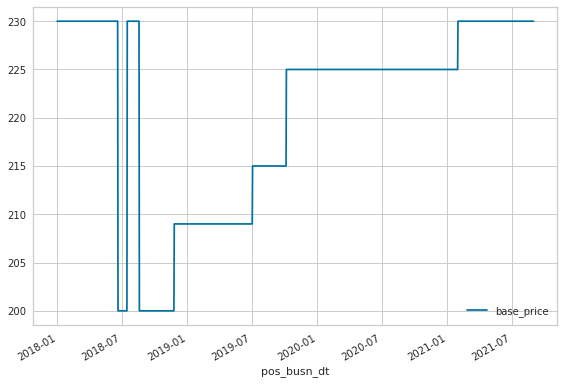

In [84]:
df.plot("pos_busn_dt","base_price")

<AxesSubplot:xlabel='pos_busn_dt'>

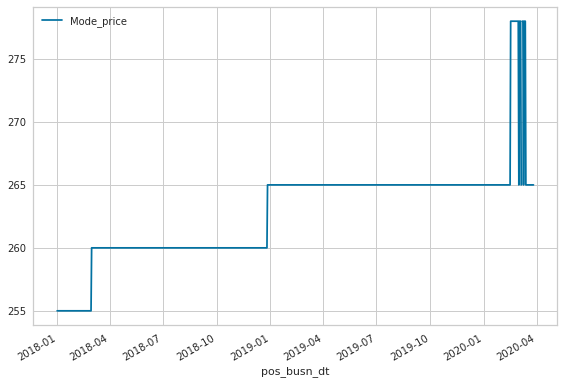

In [101]:
df_mode.plot("pos_busn_dt","Mode_price")

<AxesSubplot:xlabel='pos_busn_dt'>

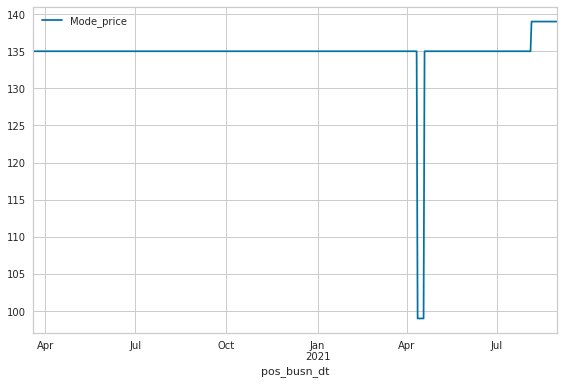

In [26]:
df_item_mode[df_item_mode.sld_menu_itm_id==2100].plot("pos_busn_dt","Mode_price")

<AxesSubplot:xlabel='pos_busn_dt'>

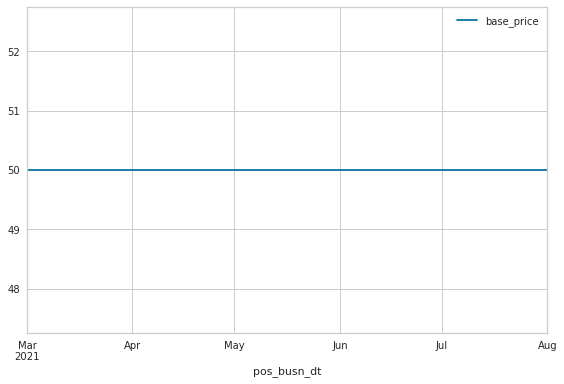

In [68]:
df_dig[df_dig.sld_menu_itm_id==2010].plot("pos_busn_dt","base_price")